<a href="https://colab.research.google.com/github/sashikiran-76/LLM_for_medical_QA/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.display import clear_output
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# **Flan-XXL**

In [ ]:
import pandas as pd
# del flan_results
flan_results = pd.read_csv('/content/drive/MyDrive/Flan-xxl_results_new_17Jul.csv')

In [ ]:
flan_results.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [ ]:
qa_data = pd.read_json('/content/data_12Jun_edited.json')
qa_data.head()

,question,options,answer
0,[1. A 65yo man presents with painless hematuri...,"[a. US Abdomen\n, b. Flexible cystoscopy\n, c....",[Ans. The key is B. Flexible cystoscopy. [Pain...
1,[2. A 74yo smoker presented to his GP with cou...,"[a. Pseudocushing syndrome\n, b. Conns disease...",[Ans. The key is C. Ectopic ACTH. [The patient...
2,[3. A 44yo woman has lost weight over 12 month...,"[a. Thyroid antibodies\n, b. TFT\n, c. ECG\n, ...",[Ans. The key is B. TFT. [The patient has paro...
3,[4. A 79yo anorexic male complains of thirst a...,"[a. BPH\n, b. Prostate carcinoma\n, c. Chronic...",[Ans. The key is B. Prostate Carcinoma.\n]
4,[5. A 64yo man has recently suffered from an M...,"[a. Lofepramine\n, b. Dosulepin\n, c. Citalopr...",[Ans. The key is C. Citalopram. [Among SSRIs S...


In [ ]:
qa_data['Predicted_answer'] = flan_results['0']
qa_data.head()

,question,options,answer,Predicted_answer
0,[1. A 65yo man presents with painless hematuri...,"[a. US Abdomen\n, b. Flexible cystoscopy\n, c....",[Ans. The key is B. Flexible cystoscopy. [Pain...,{'generated_text': 'e.'}
1,[2. A 74yo smoker presented to his GP with cou...,"[a. Pseudocushing syndrome\n, b. Conns disease...",[Ans. The key is C. Ectopic ACTH. [The patient...,{'generated_text': 'a.'}
2,[3. A 44yo woman has lost weight over 12 month...,"[a. Thyroid antibodies\n, b. TFT\n, c. ECG\n, ...",[Ans. The key is B. TFT. [The patient has paro...,{'generated_text': 'd.'}
3,[4. A 79yo anorexic male complains of thirst a...,"[a. BPH\n, b. Prostate carcinoma\n, c. Chronic...",[Ans. The key is B. Prostate Carcinoma.\n],{'generated_text': 'd.'}
4,[5. A 64yo man has recently suffered from an M...,"[a. Lofepramine\n, b. Dosulepin\n, c. Citalopr...",[Ans. The key is C. Citalopram. [Among SSRIs S...,{'generated_text': 'd.'}


In [ ]:
import re
def get_expected_option_index(value):
  # print (value)
  if 'key is' in value:
    first_split = re.split(r'key is', value)
    alpha_index = re.split(r'\.', first_split[1])
    return_value = alpha_index[0]
  elif 'Key is' in value:
    first_split = re.split(r'Key is', value)
    alpha_index = re.split(r'\.', first_split[1])
    return_value = alpha_index[0]
  elif 'key not' in value:
    first_split = re.split(r' and ', value)
    alpha_index = first_split[0][-1], first_split[1][0]
    return_value = alpha_index
  else :
    return_value = value
  return return_value

In [ ]:
qa_data['expected_option'] = qa_data['answer'].apply(lambda x:get_expected_option_index(str(x)))
qa_data['expected_option'].value_counts()

 A                                                                                                                                                                                                                                                                                                               429
 B                                                                                                                                                                                                                                                                                                               398
 C                                                                                                                                                                                                                                                                                                               322
 D                                                                       

In [ ]:
import re
def get_option_index(value):
  alpha_index = re.split(r':', value)
  # print(alpha_index)
  if (len(alpha_index)>1):
    return_value = alpha_index[1].split('.')
    return_value = return_value[0].split("'")[1]
  else :
    return_value = ''
  # print (return_value)
  return return_value

In [ ]:
qa_data['predicted_option'] = qa_data['Predicted_answer'].apply(lambda x:get_option_index(str(x)))
# get_option_index(qa_data['Predicted_answer'][10])

In [ ]:
qa_data.head()

,question,options,answer,Predicted_answer,expected_option,predicted_option
0,[1. A 65yo man presents with painless hematuri...,"[a. US Abdomen\n, b. Flexible cystoscopy\n, c....",[Ans. The key is B. Flexible cystoscopy. [Pain...,{'generated_text': 'e.'},B,e
1,[2. A 74yo smoker presented to his GP with cou...,"[a. Pseudocushing syndrome\n, b. Conns disease...",[Ans. The key is C. Ectopic ACTH. [The patient...,{'generated_text': 'a.'},C,a
2,[3. A 44yo woman has lost weight over 12 month...,"[a. Thyroid antibodies\n, b. TFT\n, c. ECG\n, ...",[Ans. The key is B. TFT. [The patient has paro...,{'generated_text': 'd.'},B,d
3,[4. A 79yo anorexic male complains of thirst a...,"[a. BPH\n, b. Prostate carcinoma\n, c. Chronic...",[Ans. The key is B. Prostate Carcinoma.\n],{'generated_text': 'd.'},B,d
4,[5. A 64yo man has recently suffered from an M...,"[a. Lofepramine\n, b. Dosulepin\n, c. Citalopr...",[Ans. The key is C. Citalopram. [Among SSRIs S...,{'generated_text': 'd.'},C,d


In [ ]:
qa_data['predicted_option'].head()

0    e
1    a
2    d
3    d
4    d
Name: predicted_option, dtype: object

In [ ]:
# qa_data['predicted_option'][qa_data['predicted_option']=='D)'] = 'D'
# qa_data['predicted_option'][qa_data['predicted_option']=='240 MG/DL'] = 'None'
# qa_data['predicted_option'][qa_data['predicted_option']=='80A'] = 'None'
# qa_data['predicted_option'][qa_data['predicted_option']=='70'] = ''
# qa_data['predicted_option'][qa_data['predicted_option']=='3'] = ''
# qa_data['predicted_option'][qa_data['predicted_option']==''] = 'None'

# qa_data['predicted_option'] = qa_data['predicted_option'].apply(lambda x:str(x).upper())
qa_data['predicted_option'].value_counts()

D       454
A       340
C       322
E       279
B       273
F        14
J         7
NONE      5
G         4
H         4
I         3
M         1
Name: predicted_option, dtype: int64

In [ ]:
# temp = pd.read_csv('/content/Falcon_results_consolidated_24Jul.csv')
# qa_data['expected_option'] = temp['expected_option']
# qa_data['expected_option'][qa_data['expected_option']=='[]'] = 'None'
# qa_data['expected_option'] = qa_data['expected_option'].apply(lambda x:str(x).upper())
# qa_data['expected_option'] = qa_data['expected_option'].apply(lambda x:str(x).strip())

qa_data['expected_option'].value_counts()

A       446
B       413
C       334
D       283
E       192
F        11
NONE      7
G         5
H         4
J         4
I         3
C,D       1
A,C       1
US        1
ALL       1
Name: expected_option, dtype: int64

In [ ]:
qa_data['num_options'] = qa_data['options'].apply(lambda x:len(x))
qa_data['num_options'].value_counts()

5     1321
4      261
6       35
3       32
10      24
8        9
7        8
11       6
12       4
9        3
2        1
13       1
0        1
Name: num_options, dtype: int64

## Question length

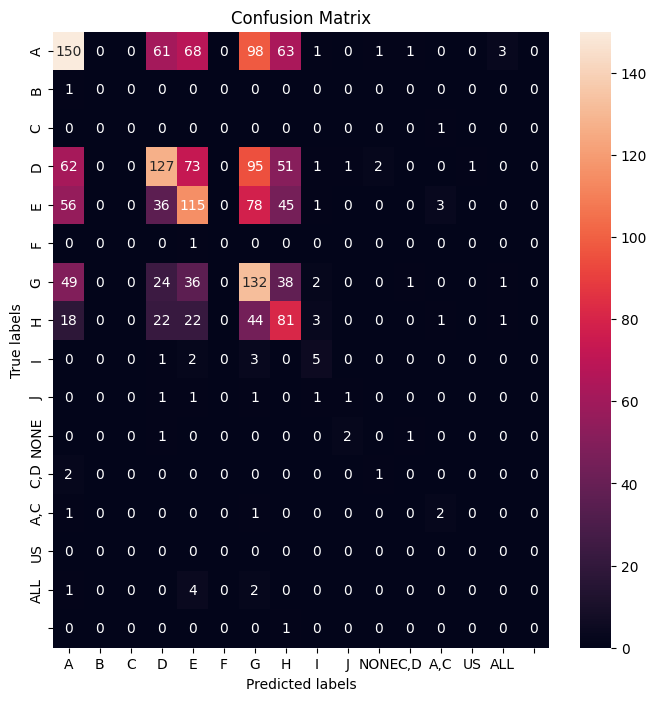

In [ ]:
cm = confusion_matrix(qa_data['expected_option'], qa_data['predicted_option'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['A','B','C','D','E','F','G','H','I','J','NONE','C,D','A,C','US','ALL', ''])
ax.yaxis.set_ticklabels(['A','B','C','D','E','F','G','H','I','J','NONE','C,D','A,C','US','ALL', '']);


In [ ]:
from sklearn.metrics import accuracy_score
print (accuracy_score(qa_data['expected_option'], qa_data['predicted_option']))


0.3593200468933177


In [ ]:
qa_data['question_length'] = qa_data['question'].apply(lambda x:len(x))
qa_data['question_length'].value_counts()

2     717
1     466
3     411
4      79
5      22
6       3
7       2
8       2
11      1
10      1
9       1
0       1
Name: question_length, dtype: int64

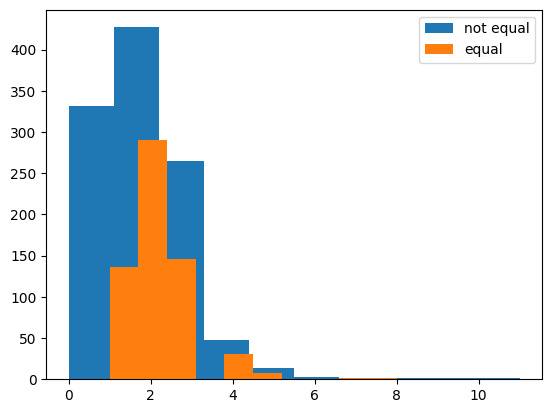

In [ ]:
plt.hist(qa_data['question_length'][qa_data['predicted_option']!=qa_data['expected_option']])
plt.hist(qa_data['question_length'][qa_data['predicted_option']==qa_data['expected_option']])
labels = ['not equal', 'equal']
plt.legend(labels)

In [ ]:
qa_data.to_csv('FlanXXL_26thJul.csv')

# **Falcon-7b**

In [ ]:
import pandas as pd

In [ ]:
# del falcon_results
falcon_results = pd.read_csv('/content/drive/MyDrive/Falcon_results_25Jul.csv')
falcon_results.shape

(1706, 8)

In [ ]:
temp = pd.read_csv('/content/Falcon_results_consolidated_24Jul.csv')
falcon_results['expected_option'] = temp['expected_option']
falcon_results['expected_option'][falcon_results['expected_option']=='[]'] = 'NONE'
falcon_results['expected_option'] = falcon_results['expected_option'].apply(lambda x:str(x).upper())
falcon_results['expected_option'] = falcon_results['expected_option'].apply(lambda x:str(x).strip())

falcon_results['expected_option'].value_counts()

<ipython-input-54-ab4cb53b88a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_results['expected_option'][falcon_results['expected_option']=='[]'] = 'NONE'


A       446
B       413
C       334
D       283
E       192
F        11
NONE      7
G         5
H         4
J         4
I         3
C,D       1
A,C       1
US        1
ALL       1
Name: expected_option, dtype: int64

In [ ]:
# import re
# def context(result, question, options):
#   result = result.split(':')[1]
#   result = result.replace('\\n',' ')
#   question = [x.replace('\n','') for x in question]
#   question = ' '.join(question)
#   question = ((re.split(r'\d\.', str(question)))[1])
#   context_var = result.replace(question, '')
#   options = [x.replace('\n','') for x in options]
#   options = ' '.join(options)
#   context_var = (context_var.replace(r"\n",' ')).rstrip('}')
#   result_term = ((context_var.replace(str(options), ''))).lstrip("' ").rstrip("'")
#   return result_term

In [ ]:
def falcon_option(gen_text):
  gen_text = gen_text.replace('\\n',' ')
  gen_text = gen_text.split(':')
  gen_text = ''.join(gen_text)
  answer = gen_text.split('The correct answer is ')[1]
  answer = answer.replace("'",'')
  option = re.split('\. ', answer)[0]
  return answer, option

In [ ]:
# options_list,ans_list  = [], []
for i,row in falcon_results.iloc[1369:].iterrows():
  ans_value, ans_opt = falcon_option(row['Falcon_25Jul'])
  ans_list.append(ans_value)
  options_list.append(ans_opt)
  # print(temp_value)
print (len(options_list), len(ans_list))

1705 1705


In [ ]:
falcon_results['falcon_ans'] = ''
falcon_results['falcon_ans'].iloc[:1368] = ans_list[:1368]
falcon_results['falcon_ans'].iloc[1368] = ''
falcon_results['falcon_ans'].iloc[1369:] = ans_list[1368:]

falcon_results['falcon_option'] = ''
falcon_results['falcon_option'].iloc[:1368] = options_list[:1368]
falcon_results['falcon_option'].iloc[1368] = ''
falcon_results['falcon_option'].iloc[1369:] = options_list[1368:]



<ipython-input-58-731c3aa8abd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_results['falcon_ans'].iloc[:1368] = ans_list[:1368]
<ipython-input-58-731c3aa8abd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_results['falcon_ans'].iloc[1368] = ''
<ipython-input-58-731c3aa8abd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_results['falcon_ans'].iloc[1369:] = ans_list[1368:]
<ipython-input-58-731c3aa8abd6>:7

In [ ]:
falcon_results['falcon_option'] = falcon_results['falcon_option'].apply(lambda x:x.upper())
falcon_results['falcon_option'][falcon_results['falcon_option']==''] = 'None'
falcon_results['falcon_option'][falcon_results['falcon_option']=='OPTION D'] = 'D'
falcon_results['falcon_option'][falcon_results['falcon_option']=='F."}]'] = 'F'
falcon_results['falcon_option'] = falcon_results['falcon_option'].apply(lambda x:x.upper())
falcon_results['falcon_option'].value_counts()

<ipython-input-61-cbdc156d7e1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_results['falcon_option'][falcon_results['falcon_option']==''] = 'None'
<ipython-input-61-cbdc156d7e1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_results['falcon_option'][falcon_results['falcon_option']=='OPTION D'] = 'D'
<ipython-input-61-cbdc156d7e1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_results['falcon_option'][fal

C       974
D       506
B       158
E        49
F         9
A         7
NONE      1
J         1
H         1
Name: falcon_option, dtype: int64

In [ ]:
falcon_results['expected_option'].value_counts()

A       446
B       413
C       334
D       283
E       192
F        11
NONE      7
G         5
H         4
J         4
I         3
C,D       1
A,C       1
US        1
ALL       1
Name: expected_option, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
print (accuracy_score(falcon_results['expected_option'], falcon_results['falcon_option']))

0.20691676436107856


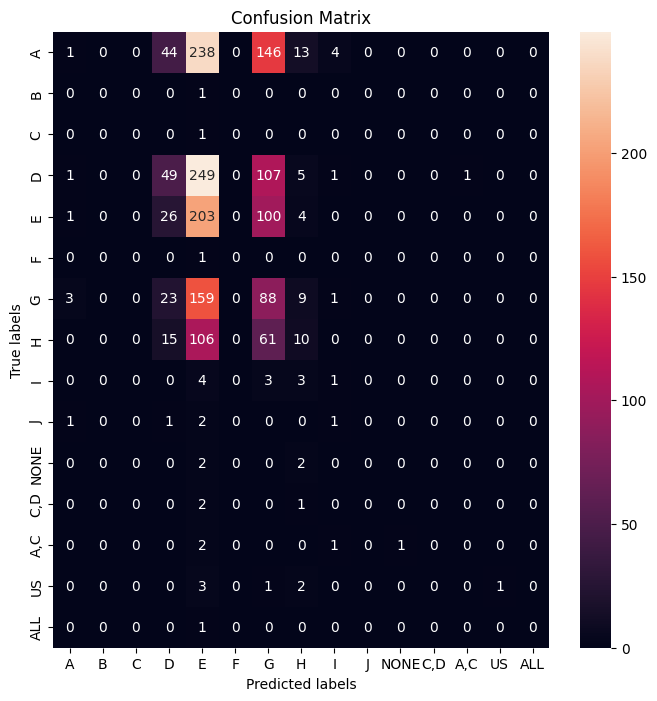

In [ ]:
cm = confusion_matrix(falcon_results['expected_option'], falcon_results['falcon_option'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['A','B','C','D','E','F','G','H','I','J','NONE','C,D','A,C','US','ALL'])
ax.yaxis.set_ticklabels(['A','B','C','D','E','F','G','H','I','J','NONE','C,D','A,C','US','ALL']);



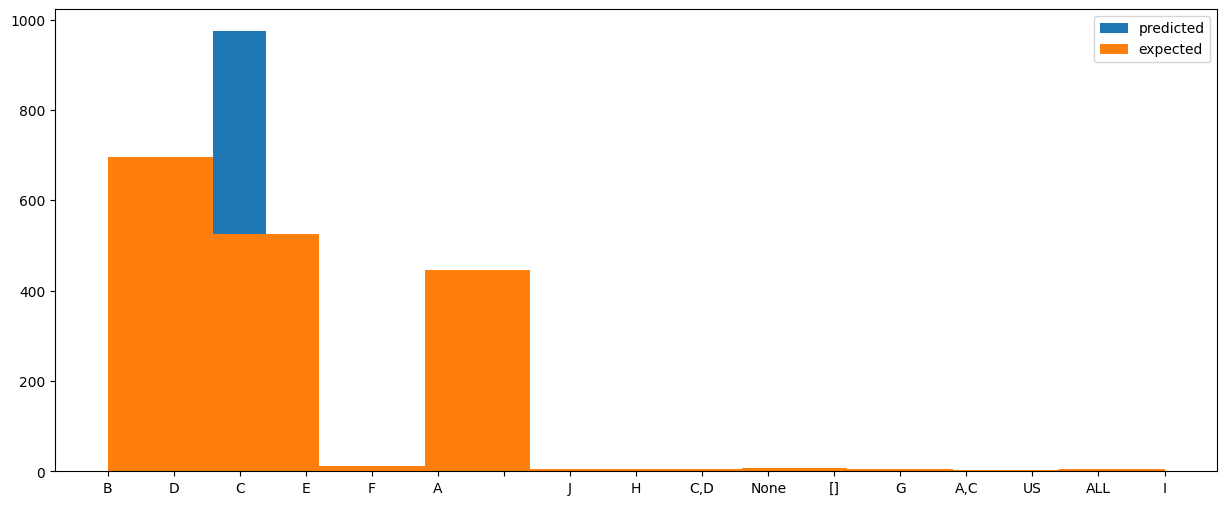

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.hist(falcon_results['falcon_option'])
plt.hist(falcon_results['expected_option'])
labels = ['predicted', 'expected']
plt.legend(labels)

In [ ]:
falcon_results['question'] = qa_data['question']

In [ ]:
falcon_results['question_length'] = falcon_results['question'].apply(lambda x:len(x))
falcon_results['question_length'].value_counts()


2     717
1     466
3     411
4      79
5      22
6       3
7       2
8       2
11      1
10      1
9       1
0       1
Name: question_length, dtype: int64

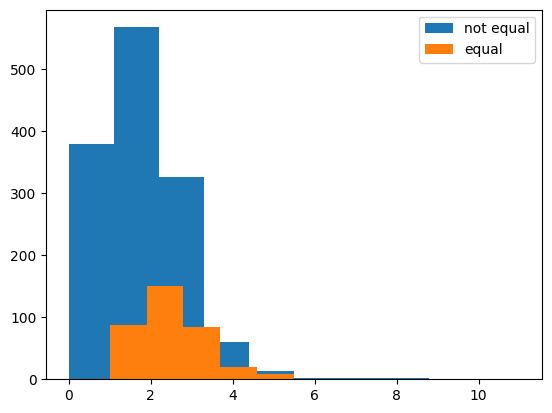

In [ ]:
plt.hist(falcon_results['question_length'][falcon_results['falcon_option']!=falcon_results['expected_option']])
plt.hist(falcon_results['question_length'][falcon_results['falcon_option']==falcon_results['expected_option']])
labels = ['not equal', 'equal']
plt.legend(labels)

In [ ]:
falcon_results.to_csv('Falcon_26thJul.csv')

# Medalpaca

In [ ]:
import pandas as pd
# medalpaca_results = pd.read_csv('/content/drive/MyDrive/Medalpaca_results_20Jul.csv')
medalpaca_results = pd.read_csv('/content/drive/MyDrive/Medalpaca_results_26Jul.csv')
from IPython.display import clear_output


In [ ]:
import re
def medalpaca_result(gen_text):
  # print (gen_text)
  answer = (gen_text.split(':'))[1]
  answer = answer.replace('"}]','')
  opt = re.split('\.', answer)[0]
  return answer, opt

In [ ]:
medalpaca_result(medalpaca_results['medalpaca_answers'][1])

('"d. Cushings disease.', '"d')

In [ ]:
# options_list,ans_list  = [], []
for i,row in medalpaca_results.iloc[1369:].iterrows():
  ans_value, ans_opt = medalpaca_result(row['medalpaca_answers'])
  ans_list.append(ans_value)
  options_list.append(ans_opt)
  # print(temp_value)
print (len(options_list), len(ans_list))

1705 1705


In [ ]:
medalpaca_results['medalpaca_ans'] = ''
medalpaca_results['medalpaca_ans'].iloc[:1368] = ans_list[:1368]
medalpaca_results['medalpaca_ans'].iloc[1368] = ''
medalpaca_results['medalpaca_ans'].iloc[1369:] = ans_list[1368:]

medalpaca_results['medalpaca_option'] = ''
medalpaca_results['medalpaca_option'].iloc[:1368] = options_list[:1368]
medalpaca_results['medalpaca_option'].iloc[1368] = ''
medalpaca_results['medalpaca_option'].iloc[1369:] = options_list[1368:]

clear_output()

In [ ]:
medalpaca_results['medalpaca_option'] = medalpaca_results['medalpaca_option'].apply(lambda x:x.strip('"'))
medalpaca_results['medalpaca_option'].iloc[390] = 'e'
medalpaca_results['medalpaca_option'].iloc[1007] = 'c'
medalpaca_results['medalpaca_option'].iloc[1679] = 'a'
medalpaca_results['medalpaca_option'][medalpaca_results['medalpaca_option']=='the radial nerve'] = 'a'
medalpaca_results['medalpaca_option'][medalpaca_results['medalpaca_option']=='the median nerve'] = 'd'
medalpaca_results['medalpaca_option'][medalpaca_results['medalpaca_option']=='PTSD'] = 'b'
medalpaca_results['medalpaca_option'][medalpaca_results['medalpaca_option']=='clopidogrel and statin'] = 'd'
medalpaca_results['medalpaca_option'][medalpaca_results['medalpaca_option']=='the axillary nerve'] = 'a'
medalpaca_results['medalpaca_option'][medalpaca_results['medalpaca_option']=='aortic dissection'] = 'b'
medalpaca_results['medalpaca_option'][medalpaca_results['medalpaca_option']=='CEREBELLUM'] = 'b'
medalpaca_results['medalpaca_option'][medalpaca_results['medalpaca_option']=='- A'] = 'a'
medalpaca_results['medalpaca_option'][medalpaca_results['medalpaca_option']=='- D'] = 'd'
medalpaca_results['medalpaca_option'][medalpaca_results['medalpaca_option']=='- C'] = 'c'
medalpaca_results['medalpaca_option'][medalpaca_results['medalpaca_option']==''] = 'None'

clear_output()
medalpaca_results['medalpaca_option'] = medalpaca_results['medalpaca_option'].apply(lambda x:x.upper())

medalpaca_results['medalpaca_option'].value_counts()

A       819
D       383
C       207
B       158
NONE     87
E        50
F         1
G         1
Name: medalpaca_option, dtype: int64

In [ ]:
print (medalpaca_results['medalpaca_option'].items())

In [ ]:
temp = pd.read_csv('/content/Falcon_results_consolidated_24Jul.csv')
medalpaca_results['expected_option'] = temp['expected_option']
medalpaca_results['expected_option'][medalpaca_results['expected_option']=='[]'] = 'None'

medalpaca_results['expected_option'].value_counts()

<ipython-input-26-1b5da92fe9cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medalpaca_results['expected_option'][medalpaca_results['expected_option']=='[]'] = 'None'


A       446
B       413
C       334
D       283
E       192
F        11
None      7
G         5
H         4
J         4
I         3
C,D       1
A,C       1
US        1
ALL       1
Name: expected_option, dtype: int64

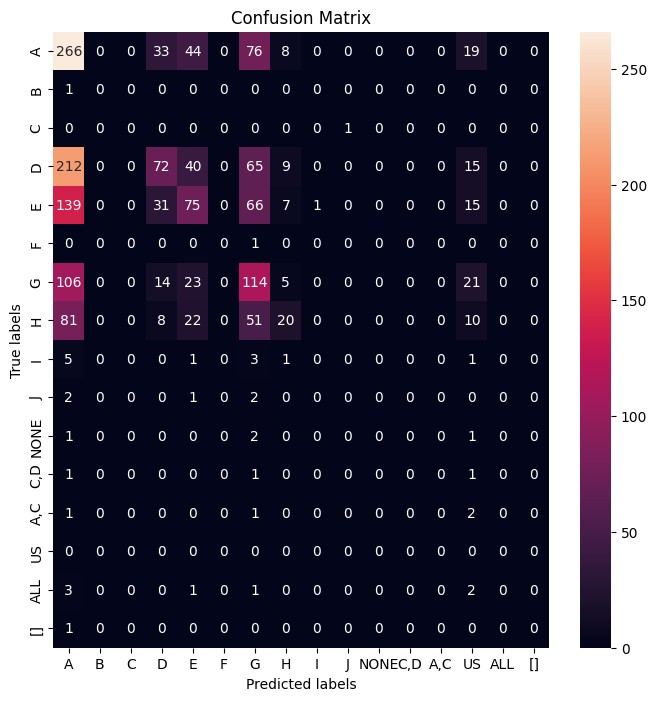

In [ ]:

cm = confusion_matrix(medalpaca_results['expected_option'], medalpaca_results['medalpaca_option'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['A','B','C','D','E','F','G','H','I','J','NONE','C,D','A,C','US','ALL', '[]'])
ax.yaxis.set_ticklabels(['A','B','C','D','E','F','G','H','I','J','NONE','C,D','A,C','US','ALL', '[]']);



# plt.figure(figsize = (6,6))
# sns.heatmap(cm, annot=True, cbar=False)
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);
# plt.xlabel("predicted")
# plt.ylabel("true")

In [ ]:
medalpaca_results['medalpaca_answers'][0]

'[{"generated_text":"c. MRI."}]'

In [ ]:
from sklearn.metrics import accuracy_score
print (accuracy_score(medalpaca_results['expected_option'], medalpaca_results['medalpaca_option']))

0.32063305978898005


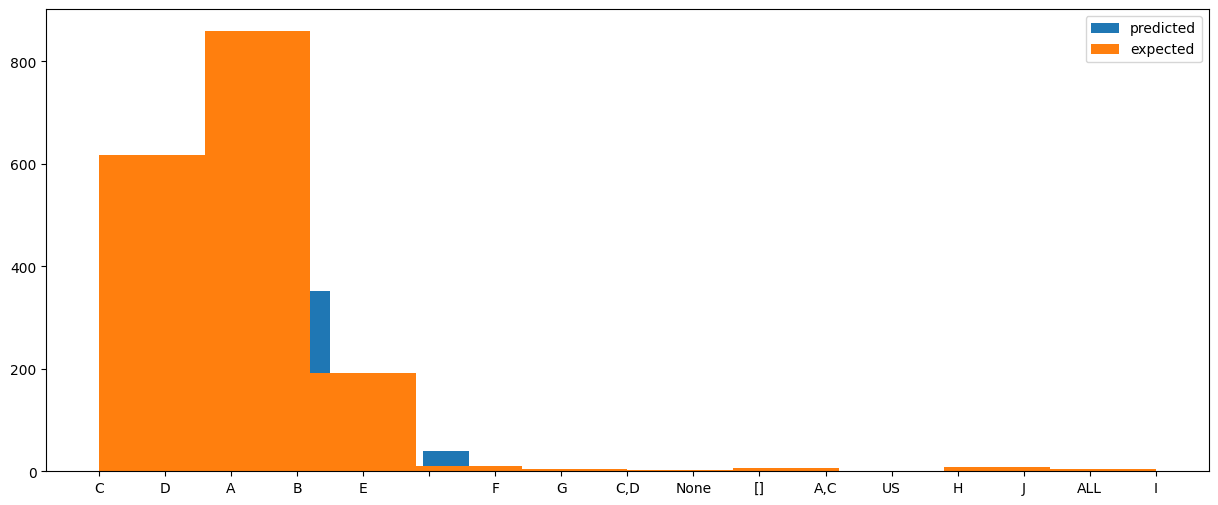

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.hist(medalpaca_results['medalpaca_option'])
plt.hist(medalpaca_results['expected_option'])
labels = ['predicted', 'expected']
plt.legend(labels)

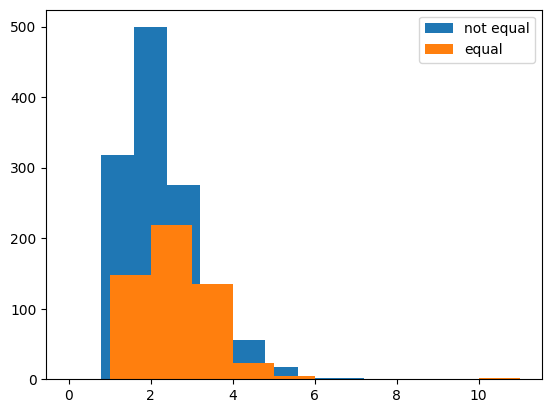

In [ ]:
medalpaca_results['question'] = qa_data['question'].copy()
medalpaca_results['question_length'] = medalpaca_results['question'].apply(lambda x:len(x))
plt.hist(medalpaca_results['question_length'][medalpaca_results['medalpaca_option']!=medalpaca_results['expected_option']])
plt.hist(medalpaca_results['question_length'][medalpaca_results['medalpaca_option']==medalpaca_results['expected_option']])
labels = ['not equal', 'equal']
plt.legend(labels)

In [ ]:
medalpaca_results.to_csv('medalpaca_26thJul.csv')

# Mean Reciprocal Rank

In [ ]:
!

In [ ]:
# !pip install gensim
!pip install nltk
!pip install sent2vec

clear_output()

In [ ]:
import sent2vec
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from scipy.spatial import distance

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(filename, binary=True)

NameError: ignored

In [ ]:
model_path = YOUR_MODEL_LOCATION
model = sent2vec.Sent2vecModel()
try:
    model.load_model(model_path)
except Exception as e:
    print(e)
print('model successfully loaded')